# ANÁLISE ENEM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('MICRODADOS_ENEM_2019 - SAMPLE.csv')
df.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,4202153,190005206871,2019,2301901,Barbalha,23,CE,28,M,1,...,B,A,A,C,A,A,D,A,B,B
1,1364583,190002369237,2019,3124708,Estrela do Indaiá,31,MG,20,M,1,...,A,A,A,B,A,A,D,A,B,B
2,675371,190001680015,2019,3205200,Vila Velha,32,ES,15,F,1,...,B,A,A,D,A,B,E,A,C,B
3,665661,190001670305,2019,2304400,Fortaleza,23,CE,20,F,1,...,A,A,A,C,B,A,C,A,A,A
4,4972861,190005977769,2019,3550308,São Paulo,35,SP,17,F,1,...,B,A,A,D,A,B,D,A,C,B


# ANALISANDO O DATASET

In [3]:
df.shape

(800000, 137)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Columns: 137 entries, Unnamed: 0 to Q025
dtypes: float64(24), int64(72), object(41)
memory usage: 836.2+ MB


In [5]:
# Identificando as colunas
df.columns.values

array(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', '

In [6]:
# Selecionando apenas as colunas importantes para análise
columns = ['NU_INSCRICAO', 'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
          'TP_ANO_CONCLUIU', 'SG_UF_RESIDENCIA', 'TP_ESCOLA','IN_TREINEIRO', 
          'CO_ESCOLA', 'TP_LOCALIZACAO_ESC', 'IN_GESTANTE', 'IN_LACTANTE', 'IN_NOME_SOCIAL',
          'TP_PRESENCA_CN', 'TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT', 'NU_NOTA_CN', 
           'TP_ST_CONCLUSAO','NU_NOTA_CH', 'NU_NOTA_LC','NU_NOTA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO', 
           'NU_NOTA_REDACAO',
           'Q001','Q002','Q003','Q004','Q005','Q006','Q007','Q008','Q009','Q010','Q011','Q012','Q013',
           'Q014','Q015','Q016','Q017','Q018','Q019','Q020','Q021','Q022','Q023','Q024','Q025']

In [7]:
# Substituindo o df apenas com as colunas selecionadas
df = df[columns]
df.sample(3)

,NU_INSCRICAO,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ANO_CONCLUIU,SG_UF_RESIDENCIA,TP_ESCOLA,IN_TREINEIRO,CO_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
267347,190004258559,17,M,1,3,0,SP,2,0,NaN,...,B,A,B,C,B,A,C,A,B,B
384578,190003261894,21,M,1,3,3,MA,1,0,NaN,...,A,A,A,B,B,A,D,A,B,B
611772,190003506385,16,F,1,3,0,MG,1,1,NaN,...,A,A,A,B,A,A,C,A,A,A


In [18]:
df.describe()

,NU_INSCRICAO,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,CO_ESCOLA,TP_LOCALIZACAO_ESC,IN_GESTANTE,...,TP_PRESENCA_MT,NU_NOTA_CN,TP_ST_CONCLUSAO,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q005
count,8.000000e+05,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,1.797640e+05,179764.000000,800000.000000,...,800000.000000,581881.000000,800000.000000,615591.000000,615591.000000,581881.000000,800000.000000,615591.000000,615591.000000,800000.000000
mean,1.900036e+11,22.088215,1.075769,2.127463,2.968694,1.329821,0.121288,3.127955e+07,1.035981,0.000251,...,0.728049,477.859757,1.541405,507.245506,520.558756,523.015243,0.524609,1.139187,571.124757,3.867954
std,1.470275e+06,7.454649,0.440109,1.017539,4.113192,0.553838,0.326461,9.667301e+06,0.186242,0.015849,...,0.445748,76.093927,0.717340,82.365908,64.080156,109.155620,0.499394,0.781709,188.549664,1.480829
min,1.900010e+11,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.100006e+07,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,1.900023e+11,18.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.356441e+07,1.000000,0.000000,...,0.000000,417.800000,1.000000,447.700000,483.600000,434.900000,0.000000,1.000000,480.000000,3.000000
50%,1.900036e+11,19.000000,1.000000,2.000000,1.000000,1.000000,0.000000,3.117277e+07,1.000000,0.000000,...,1.000000,470.500000,1.000000,510.800000,526.200000,500.800000,1.000000,1.000000,580.000000,4.000000
75%,1.900048e+11,24.000000,1.000000,3.000000,4.000000,2.000000,0.000000,3.516506e+07,1.000000,0.000000,...,1.000000,533.200000,2.000000,566.600000,565.300000,597.900000,1.000000,1.000000,680.000000,5.000000
max,1.900061e+11,94.000000,4.000000,5.000000,13.000000,3.000000,1.000000,5.308802e+07,2.000000,1.000000,...,2.000000,841.800000,4.000000,835.100000,801.700000,985.500000,1.000000,9.000000,1000.000000,20.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 51 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   NU_INSCRICAO        800000 non-null  int64  
 1   NU_IDADE            800000 non-null  int64  
 2   TP_SEXO             800000 non-null  object 
 3   TP_ESTADO_CIVIL     800000 non-null  int64  
 4   TP_COR_RACA         800000 non-null  int64  
 5   TP_ANO_CONCLUIU     800000 non-null  int64  
 6   SG_UF_RESIDENCIA    800000 non-null  object 
 7   TP_ESCOLA           800000 non-null  int64  
 8   IN_TREINEIRO        800000 non-null  int64  
 9   CO_ESCOLA           179764 non-null  float64
 10  TP_LOCALIZACAO_ESC  179764 non-null  float64
 11  IN_GESTANTE         800000 non-null  int64  
 12  IN_LACTANTE         800000 non-null  int64  
 13  IN_NOME_SOCIAL      800000 non-null  int64  
 14  TP_PRESENCA_CN      800000 non-null  int64  
 15  TP_PRESENCA_CH      800000 non-nul

In [8]:
# Verificando valores nulos
df.isna().sum()

NU_INSCRICAO               0
NU_IDADE                   0
TP_SEXO                    0
TP_ESTADO_CIVIL            0
TP_COR_RACA                0
TP_ANO_CONCLUIU            0
SG_UF_RESIDENCIA           0
TP_ESCOLA                  0
IN_TREINEIRO               0
CO_ESCOLA             620236
TP_LOCALIZACAO_ESC    620236
IN_GESTANTE                0
IN_LACTANTE                0
IN_NOME_SOCIAL             0
TP_PRESENCA_CN             0
TP_PRESENCA_CH             0
TP_PRESENCA_LC             0
TP_PRESENCA_MT             0
NU_NOTA_CN            218119
TP_ST_CONCLUSAO            0
NU_NOTA_CH            184409
NU_NOTA_LC            184409
NU_NOTA_MT            218119
TP_LINGUA                  0
TP_STATUS_REDACAO     184409
NU_NOTA_REDACAO       184409
Q001                       0
Q002                       0
Q003                       0
Q004                       0
Q005                       0
Q006                       0
Q007                       0
Q008                       0
Q009          

In [10]:
# Contando a quantidade de NaN no dataframe
valores_nulos = np.count_nonzero(~np.isnan(df['CO_ESCOLA']))
valores_nulos

179764

# ANÁLISE POR ESTADO

In [11]:
# Selecionando só os Estados
df['SG_UF_RESIDENCIA']

0         CE
1         MG
2         ES
3         CE
4         SP
          ..
799995    SP
799996    AM
799997    CE
799998    RJ
799999    SE
Name: SG_UF_RESIDENCIA, Length: 800000, dtype: object

In [12]:
# Identificando quais estados temos
df['SG_UF_RESIDENCIA'].unique()

array(['CE', 'MG', 'ES', 'SP', 'PA', 'PE', 'RJ', 'PR', 'PI', 'SC', 'AM',
       'MS', 'TO', 'MT', 'AC', 'PB', 'RN', 'AP', 'DF', 'BA', 'RR', 'AL',
       'MA', 'RS', 'GO', 'SE', 'RO'], dtype=object)

In [13]:
# Descobrindo a quantidade de Estados
len(df['SG_UF_RESIDENCIA'].unique())

27

In [14]:
# Descobrindo quantas pessoas são de cada Estado
df['SG_UF_RESIDENCIA'].value_counts()

SP    128173
MG     84571
BA     62705
RJ     52812
CE     46503
PA     44273
PE     42480
MA     34698
RS     34461
PR     32808
GO     26574
PB     23238
RN     18958
PI     18855
AM     18399
SC     17086
ES     16092
DF     14825
AL     14507
MT     13857
SE     11722
MS     10932
RO      9293
TO      7314
AP      6670
AC      6121
RR      2073
Name: SG_UF_RESIDENCIA, dtype: int64

# ANÁLISE POR IDADE

In [16]:
# Colocando em ordem crescente de idade
df['NU_IDADE'].value_counts().sort_index()

3     1
5     4
6     2
7     2
8     1
     ..
81    1
83    1
84    1
88    1
94    1
Name: NU_IDADE, Length: 81, dtype: int64

In [17]:
# Visualizando o menor e a maior idade
print('O aluno mais novo tem {} anos e o mais velho {} anos'.format(df['NU_IDADE'].min(), 
                                                                                  df['NU_IDADE'].max()))

O aluno mais novo tem 3 anos e o mais velho 94 anos


Vamos considerar apenas alunos a partir de 13 anos.

In [24]:
# Descobrindo quantos alunos tem menos que 13 anos
df['NU_IDADE'][df['NU_IDADE'] <= 13].count()

58

In [25]:
# Descobrindo de que Estado são as pessoas de 13 anos
df[df['NU_IDADE'] <= 13]['SG_UF_RESIDENCIA'].value_counts()

SP    10
MA     9
PA     6
PE     5
RO     3
AP     3
PB     3
PR     3
SE     2
SC     2
BA     2
DF     2
CE     2
RJ     2
PI     2
AL     1
GO     1
Name: SG_UF_RESIDENCIA, dtype: int64

In [26]:
# Fazendo a proporção por idade
df['NU_IDADE'].value_counts(normalize = True)

18    0.169472
17    0.166146
19    0.113440
20    0.080235
16    0.062370
        ...   
88    0.000001
81    0.000001
83    0.000001
84    0.000001
3     0.000001
Name: NU_IDADE, Length: 81, dtype: float64

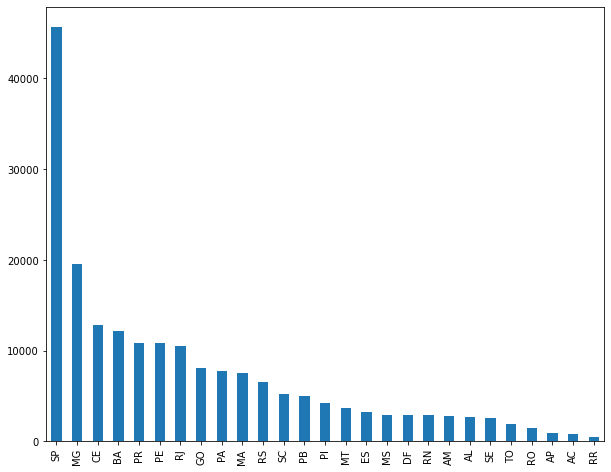

In [28]:
# Analisando alunos menores de 18 anos por região
df.query('NU_IDADE < 18')['SG_UF_RESIDENCIA'].value_counts().plot.bar(figsize = (10, 8))

Text(0.5, 1.0, 'Quantidade de inscritos por idade')

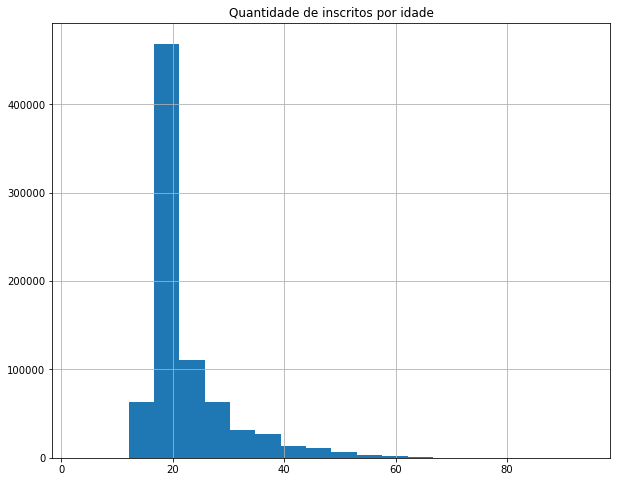

In [30]:
df['NU_IDADE'].hist(bins = 20, figsize = (10 , 8))
plt.title("Quantidade de inscritos por idade")

# ANALISANDO TREINEIROS

In [31]:
# Trazendo informações apenas de pessoas que são treineiras
df.query('IN_TREINEIRO == 1')

,NU_INSCRICAO,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ANO_CONCLUIU,SG_UF_RESIDENCIA,TP_ESCOLA,IN_TREINEIRO,CO_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
2,190001680015,15,F,1,1,0,ES,1,1,NaN,...,B,A,A,D,A,B,E,A,C,B
11,190005914228,17,F,1,1,0,SC,1,1,NaN,...,B,A,A,C,A,A,C,A,B,B
17,190005408024,21,M,1,1,0,PA,1,1,NaN,...,A,A,A,A,A,A,B,A,A,A
26,190005252612,16,M,3,1,0,MT,1,1,NaN,...,A,A,A,B,A,A,B,A,B,B
46,190004957716,17,F,1,1,0,AP,1,1,NaN,...,B,A,A,B,B,A,D,A,B,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799960,190004596423,17,F,1,3,0,RN,1,1,NaN,...,B,A,A,B,B,A,C,A,A,A
799964,190005879019,17,F,1,1,0,SP,1,1,NaN,...,B,A,A,C,B,B,E,B,B,B
799972,190002163025,15,F,1,3,0,MG,1,1,NaN,...,A,A,A,B,A,A,E,A,B,B
799978,190003541385,16,F,1,1,0,ES,1,1,NaN,...,B,A,A,B,B,B,D,A,B,B


In [35]:
# Ordenando os treineiros por idade
df[df['IN_TREINEIRO'] == 1]['NU_IDADE'].value_counts().sort_index()

5         1
6         2
11        1
12        1
13        4
14      303
15    11808
16    45403
17    30680
18     5658
19     1525
20      488
21      225
22      128
23      106
24       73
25       71
26       52
27       50
28       37
29       27
30       49
31       34
32       34
33       25
34       23
35       26
36       22
37       18
38       11
39       21
40        9
41        7
42       12
43       19
44       10
45        3
46        4
47        6
48        6
49        9
50        4
51        1
52        3
53        4
54        4
55        5
56        2
57        4
58        2
59        1
60        2
61        1
62        1
63        3
67        2
Name: NU_IDADE, dtype: int64

Observamos que na amostra temos treineiros de 5 e 6 anos... o_o

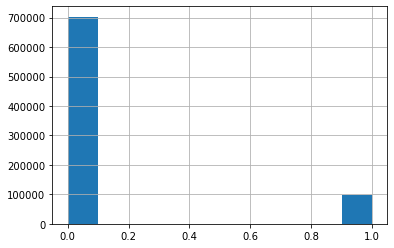

In [36]:
# Histograma da galera que é treineiro x não é treineiro
df['IN_TREINEIRO'].hist()

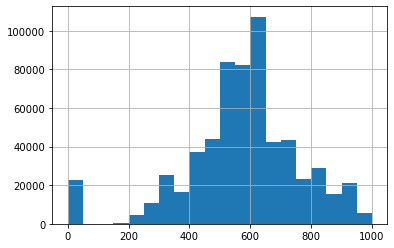

In [37]:
# Histograma dos treineiros
df['NU_NOTA_REDACAO'].hist(bins = 20)

# ANÁLISE DAS NOTAS

In [38]:
# Análise das notas de redação
df['NU_NOTA_REDACAO'].describe()

count    615591.000000
mean        571.124757
std         188.549664
min           0.000000
25%         480.000000
50%         580.000000
75%         680.000000
max        1000.000000
Name: NU_NOTA_REDACAO, dtype: float64

In [39]:
# Estatística das notas
notas_provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']
df[notas_provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,581881.000000,615591.000000,581881.000000,615591.000000,615591.000000
mean,477.859757,507.245506,523.015243,520.558756,571.124757
std,76.093927,82.365908,109.155620,64.080156,188.549664
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,417.800000,447.700000,434.900000,483.600000,480.000000
50%,470.500000,510.800000,500.800000,526.200000,580.000000
75%,533.200000,566.600000,597.900000,565.300000,680.000000
max,841.800000,835.100000,985.500000,801.700000,1000.000000


In [40]:
# Descobrindo a média dos 10% mais alto
df['NU_NOTA_LC'].quantile(.9)

596.4

# BOXPLOT

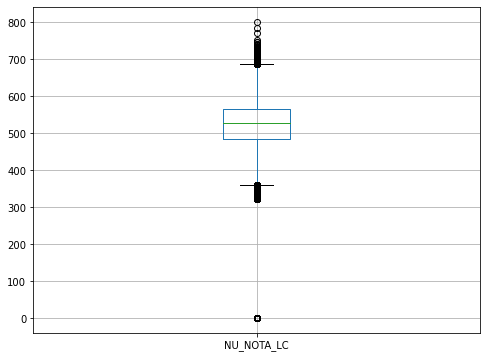

In [41]:
df['NU_NOTA_LC'].plot.box(grid = True, figsize = (8, 6))

C:\Users\KEB\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


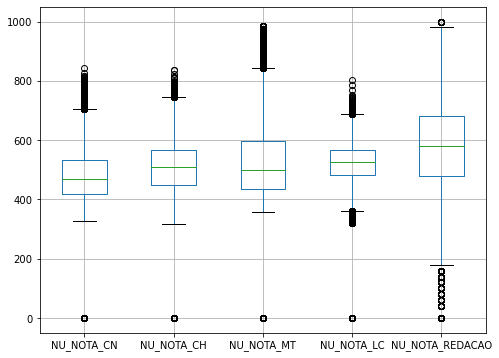

In [42]:
df[notas_provas].plot.box(grid = True, figsize = (8, 6))

In [44]:
renda_ordenada = df['Q006'].unique()
renda_ordenada.sort()
renda_ordenada

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q'], dtype=object)

Text(0.5, 1.0, 'Boxplot das notas de matemática pela renda')

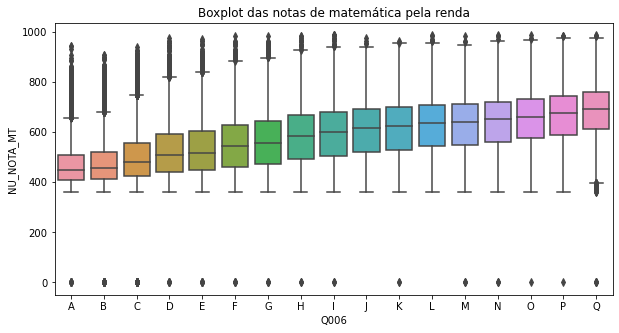

In [45]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = "Q006", y = 'NU_NOTA_MT', data = df, order = renda_ordenada)
plt.title("Boxplot das notas de matemática pela renda")

In [47]:
# Criando uma coluna com as notas totais de cada aluno
df["NU_NOTA_TOTAL"] = df[notas_provas].sum(axis = 1)

In [48]:
df

,NU_INSCRICAO,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ANO_CONCLUIU,SG_UF_RESIDENCIA,TP_ESCOLA,IN_TREINEIRO,CO_ESCOLA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190005206871,28,M,1,4,11,CE,1,0,NaN,...,A,A,C,A,A,D,A,B,B,0.0
1,190002369237,20,M,1,3,2,MG,1,0,NaN,...,A,A,B,A,A,D,A,B,B,2642.2
2,190001680015,15,F,1,1,0,ES,1,1,NaN,...,A,A,D,A,B,E,A,C,B,0.0
3,190001670305,20,F,1,3,0,CE,2,0,23074060.0,...,A,A,C,B,A,C,A,A,A,2403.4
4,190005977769,17,F,1,1,0,SP,3,0,NaN,...,A,A,D,A,B,D,A,C,B,3021.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,190004640990,26,M,1,3,0,SP,1,0,NaN,...,A,A,A,A,A,C,A,B,B,2274.7
799996,190001035522,17,F,1,4,0,AM,3,0,13031767.0,...,A,A,B,A,A,C,A,B,B,3240.8
799997,190001912187,27,F,1,2,9,CE,1,0,NaN,...,A,A,B,A,A,B,A,A,B,0.0
799998,190002443449,17,F,1,3,0,RJ,2,0,33099049.0,...,A,A,B,A,B,A,B,B,B,2410.3


Text(0.5, 1.0, 'Boxplot das notas totais pela renda')

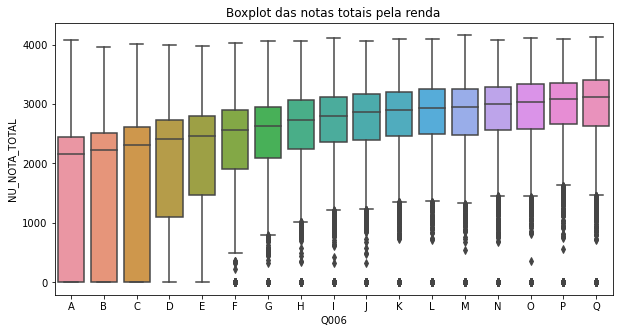

In [49]:
# Boxplot das notas por renda
plt.figure(figsize = (10, 5))
sns.boxplot(x = "Q006", y = 'NU_NOTA_TOTAL', data = df, order = renda_ordenada)
plt.title("Boxplot das notas totais pela renda")

In [50]:
# Fazendo levantamento das pessoas que não possuem nenhuma nota
notas_provas.append("NU_NOTA_TOTAL")
df[notas_provas].query('NU_NOTA_TOTAL == 0')

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
0,NaN,NaN,NaN,NaN,NaN,0.0
2,NaN,NaN,NaN,NaN,NaN,0.0
6,NaN,NaN,NaN,NaN,NaN,0.0
7,NaN,NaN,NaN,NaN,NaN,0.0
9,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
799986,NaN,NaN,NaN,NaN,NaN,0.0
799987,NaN,NaN,NaN,NaN,NaN,0.0
799989,NaN,NaN,NaN,NaN,NaN,0.0
799994,NaN,NaN,NaN,NaN,NaN,0.0


In [51]:
# Colocando eles em uma variável
dados_sem_nota_zero = df.query('NU_NOTA_TOTAL != 0')
dados_sem_nota_zero

,NU_INSCRICAO,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ANO_CONCLUIU,SG_UF_RESIDENCIA,TP_ESCOLA,IN_TREINEIRO,CO_ESCOLA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
1,190002369237,20,M,1,3,2,MG,1,0,NaN,...,A,A,B,A,A,D,A,B,B,2642.2
3,190001670305,20,F,1,3,0,CE,2,0,23074060.0,...,A,A,C,B,A,C,A,A,A,2403.4
4,190005977769,17,F,1,1,0,SP,3,0,NaN,...,A,A,D,A,B,D,A,C,B,3021.5
5,190004180092,34,M,1,1,13,PA,1,0,NaN,...,A,A,B,A,A,B,A,A,B,2994.1
8,190001138286,18,F,1,1,0,CE,2,0,23252626.0,...,A,A,B,A,A,C,A,A,B,2062.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799993,190003052017,21,F,1,1,4,TO,1,0,NaN,...,A,A,C,A,B,E,A,B,B,3185.7
799995,190004640990,26,M,1,3,0,SP,1,0,NaN,...,A,A,A,A,A,C,A,B,B,2274.7
799996,190001035522,17,F,1,4,0,AM,3,0,13031767.0,...,A,A,B,A,A,C,A,B,B,3240.8
799998,190002443449,17,F,1,3,0,RJ,2,0,33099049.0,...,A,A,B,A,B,A,B,B,B,2410.3


Text(0.5, 1.0, 'Boxplot das notas totais pela renda')

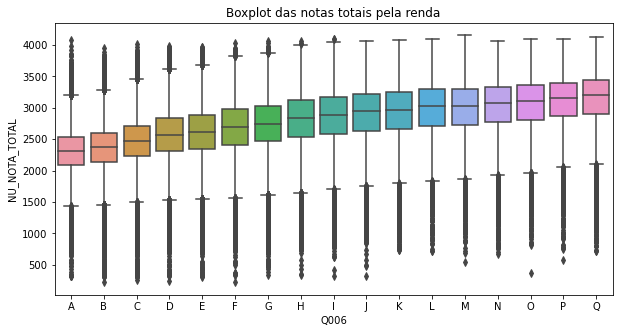

In [52]:
# Levando em consideração quem não zerou em todas as provas
plt.figure(figsize = (10, 5))
sns.boxplot(x = "Q006", y = 'NU_NOTA_TOTAL', data = dados_sem_nota_zero, order = renda_ordenada)
plt.title("Boxplot das notas totais pela renda")

Text(0.5, 1.0, 'Boxplot das notas totais pela renda')

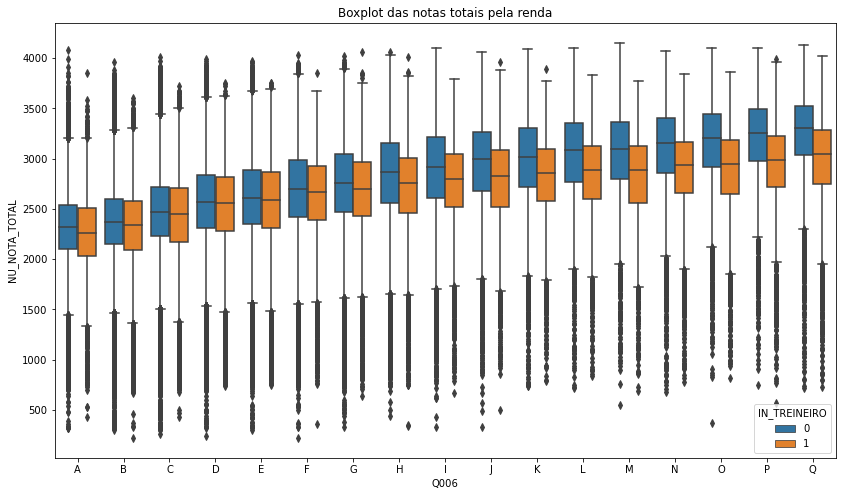

In [53]:
# Fazendo levantamento das notas por renda, comprando tbm quem é com quem não é treineiro
plt.figure(figsize = (14, 8))
sns.boxplot(x = "Q006", y = 'NU_NOTA_TOTAL', data = dados_sem_nota_zero, hue = 'IN_TREINEIRO',
            order = renda_ordenada)
plt.title("Boxplot das notas totais pela renda")

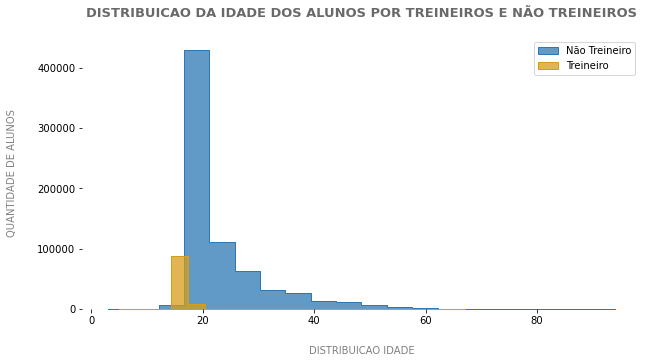

In [54]:
#Definindo o tamanho da "imagem" (grafico)
ax = plt.figure(figsize=(10, 5))

# Selecionando os dados e configurando o histograma
sns.histplot(df[df['IN_TREINEIRO'] == 0]['NU_IDADE'], bins = 20, label = 'Não Treineiro',
             element = 'step', color = '#2e79b5')

sns.histplot(df[df['IN_TREINEIRO'] == 1]['NU_IDADE'], bins = 20, label = 'Treineiro',
             element = 'step', color = '#d79d19')

# Definindo a legenda
plt.legend()

#removend as bordas
sns.despine(bottom = True,left = True) 

#Definindo o rótulo do eixo x
plt.xlabel('DISTRIBUICAO IDADE', color = 'grey', labelpad = 20, fontsize = 10) 

#Definindo o rótulo do eixo x
plt.ylabel('QUANTIDADE DE ALUNOS', color = 'grey', labelpad = 20, fontsize = 10) 

#Configurando o título do gráfico
plt.title('DISTRIBUICAO DA IDADE DOS ALUNOS POR TREINEIROS E NÃO TREINEIROS', pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold') 


ax = ax

<h1> Distribuições e Correlações

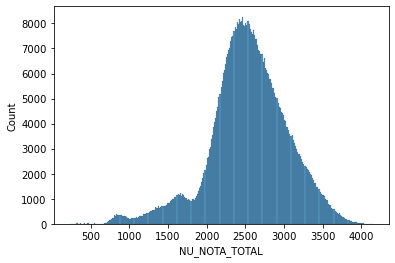

In [55]:
sns.histplot(dados_sem_nota_zero, x = 'NU_NOTA_TOTAL')

(-50.0, 1050.0)

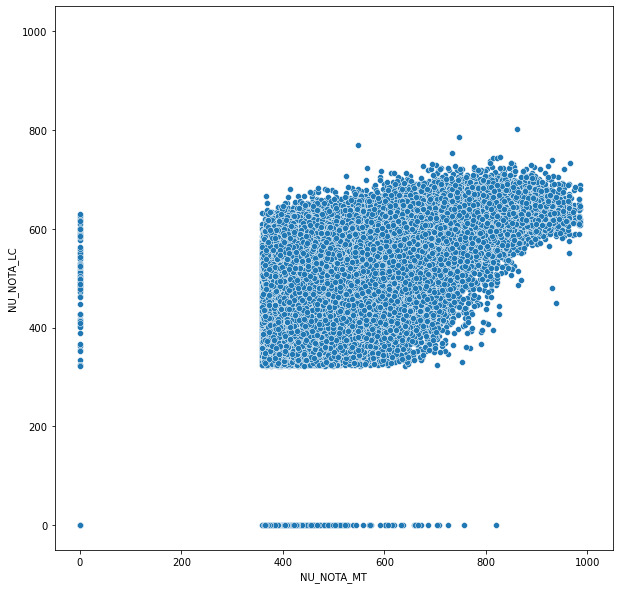

In [56]:
plt.figure(figsize = (10, 10))
sns.scatterplot(data = dados_sem_nota_zero, x = "NU_NOTA_MT", y = 'NU_NOTA_LC')
plt.xlim(-50, 1050)
plt.ylim(-50, 1050)

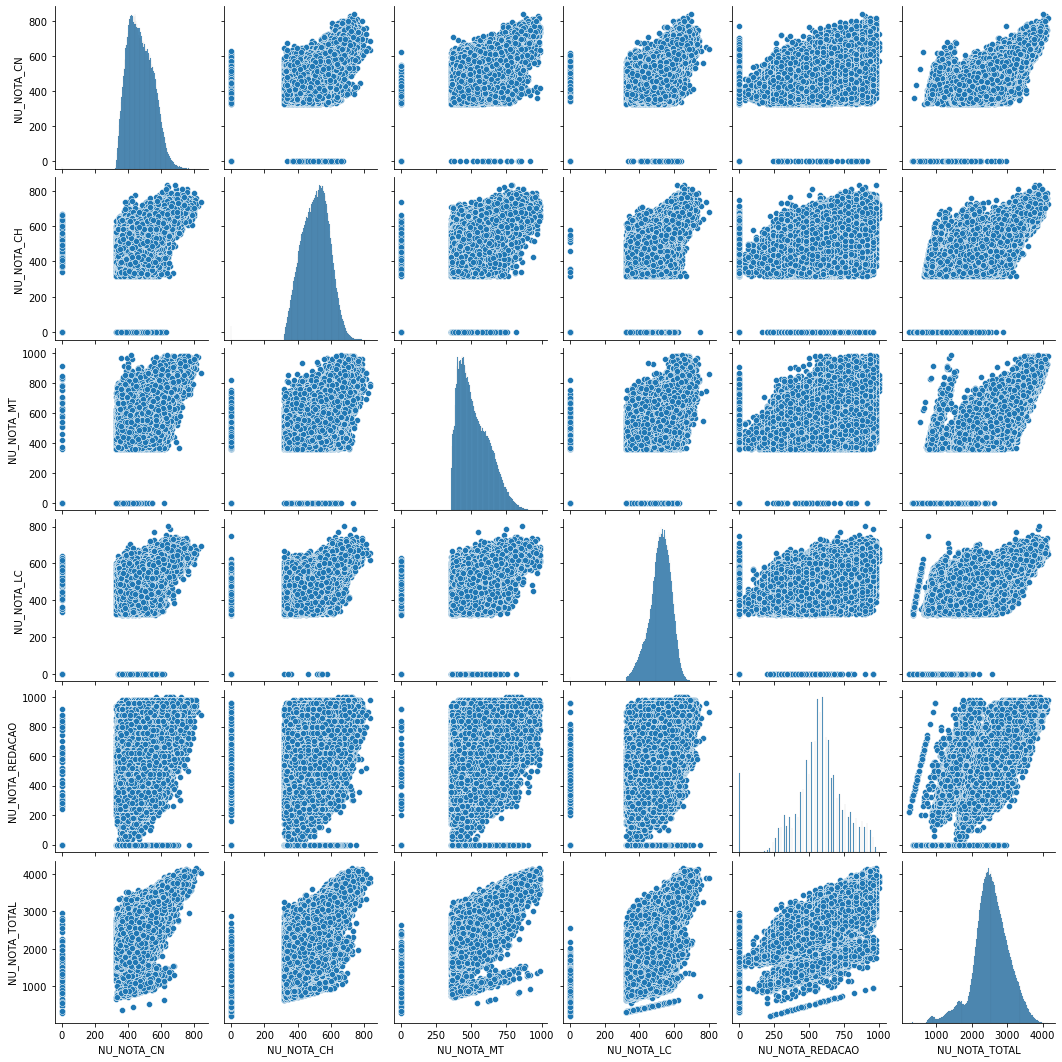

In [57]:
sns.pairplot(dados_sem_nota_zero[notas_provas])

In [58]:
# Calculando a correlação
correlacao = dados_sem_nota_zero[notas_provas].corr()
correlacao

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
NU_NOTA_CN,1.000000,0.669330,0.649470,0.644223,0.505784,0.785780
NU_NOTA_CH,0.669330,1.000000,0.611736,0.741873,0.528748,0.732667
NU_NOTA_MT,0.649470,0.611736,1.000000,0.591298,0.496455,0.789540
NU_NOTA_LC,0.644223,0.741873,0.591298,1.000000,0.537324,0.712621
NU_NOTA_REDACAO,0.505784,0.528748,0.496455,0.537324,1.000000,0.784719
NU_NOTA_TOTAL,0.785780,0.732667,0.789540,0.712621,0.784719,1.000000


Correlação é uma medida que vai de -1, 0 a +1.
Quando uma variável não tem correlação com uma outra variável, ela tem correlação = 0.
Quando eu tenho uma correlação negativa, isso significa que quando uma sobe, a outra está descendo na mesma proporção.
Quando tenho correlação positiva, significa que quando uma sobe, a outra sobe na mesma proporção

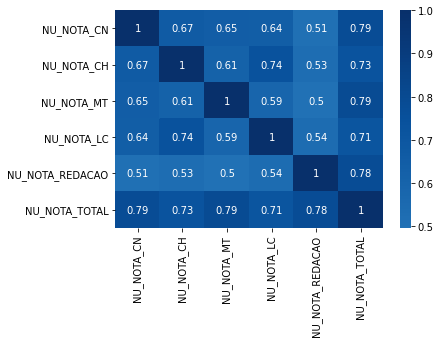

In [59]:
sns.heatmap(correlacao, cmap=('Blues'), center = 0, annot=True)

<h1>MODELO DE MACHINE LEARNING

In [60]:
# Modelo que prevê as notas de matemática
provas_entrada = ["NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_CN", "NU_NOTA_REDACAO"]
provas_saida = "NU_NOTA_MT"

In [61]:
dados_sem_nota_zero = dados_sem_nota_zero[notas_provas].dropna()
notas_entrada = dados_sem_nota_zero[provas_entrada]
notas_saida = dados_sem_nota_zero[provas_saida]

In [62]:
x = notas_entrada
y = notas_saida

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
# Separando 25% dos meus dados para fazer teste
# Setar pra que ele não fique no random toda vez que eu rodar o programa
seed = 4321
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25, random_state = seed)

In [65]:
x_treino.head()

,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_REDACAO
333926,423.8,390.9,430.7,540.0
710260,464.1,533.3,498.0,520.0
387431,632.1,565.2,555.5,860.0
227053,600.7,595.2,581.0,920.0
320344,605.9,609.0,549.1,760.0


In [66]:
# a quantidade de linhas precisam ser as mesmas para x e y
x_treino.shape

(435396, 4)

In [67]:
y_treino.shape

(435396,)

In [68]:
from sklearn.svm import LinearSVR
modelo = LinearSVR(random_state = seed)
modelo.fit(x_treino, y_treino)

C:\Users\KEB\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVR(random_state=4321)

In [69]:
predicoes_matematica = modelo.predict(x_teste)

In [70]:
y_teste[:5]

572329    424.0
517242    374.2
420938    661.4
342652    571.0
775077    572.2
Name: NU_NOTA_MT, dtype: float64

(-50.0, 1050.0)

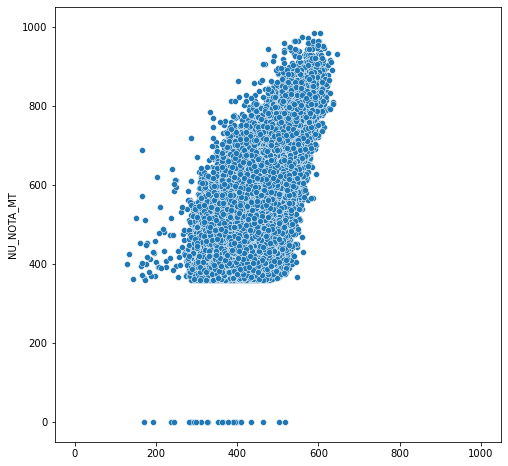

In [71]:
plt.figure(figsize = (8, 8))
sns.scatterplot(x = predicoes_matematica, y = y_teste)
plt.xlim(-50, 1050)
plt.ylim(-50, 1050)

In [72]:
resultados = pd.DataFrame()
resultados["Real"] = y_teste
resultados['Previsão'] = predicoes_matematica
resultados['Diferença'] = resultados['Real'] - resultados['Previsão']
resultados['Quadrado Diferença'] = (resultados['Real'] - resultados['Previsão'])**2

In [73]:
resultados

,Real,Previsão,Diferença,Quadrado Diferença
572329,424.0,352.460018,71.539982,5117.969050
517242,374.2,376.990358,-2.790358,7.786098
420938,661.4,492.704339,168.695661,28458.226169
342652,571.0,510.598396,60.401604,3648.353803
775077,572.2,377.525070,194.674930,37898.328503
...,...,...,...,...
120484,422.1,373.799172,48.300828,2332.969984
116218,616.7,449.954564,166.745436,27804.040504
242893,394.0,358.893377,35.106623,1232.474984
420455,693.2,536.410284,156.789716,24583.015023


In [74]:
resultados['Quadrado Diferença'].mean()

14990.41154888114

In [75]:
resultados['Quadrado Diferença'].mean()**(1/2)

122.43533619376859

In [76]:
from sklearn.dummy import DummyRegressor

In [77]:
modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

In [78]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_teste, dummy_predicoes)

11879.476645443554

In [79]:
mean_squared_error(y_teste, predicoes_matematica)

14990.411548881377